# Optinal Labs - Simple Neuron Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
# DataSet
X,Y = load_coffee_data(); print(X.shape, Y.shape)

(200, 2) (200, 1)


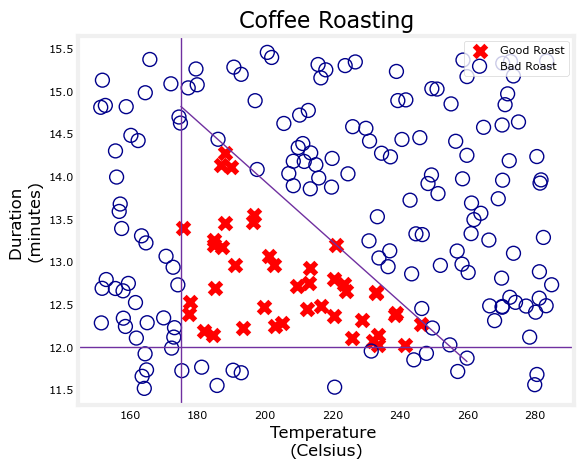

In [3]:
plt_roast(X, Y)

# Normalize Data

In [5]:
print(f"Temparature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X) # Learns mean, variance 
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temparature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [7]:
#Tile/Copy our data to increase the training set size and reduce the number of training epochs
Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


# Tensorflow Model


In [8]:
tf.random.set_seed(1234) # applied to achieve consistent results
model = Sequential(
[
    tf.keras.Input(shape=(2,)),
    Dense(3, activation='sigmoid', name='layer1'),
    Dense(1, activation='sigmoid', name='layer2'),   
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [10]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb1{b2.shape}:", b2)

W1(2, 3):
 [[ 0.77 -0.12 -0.05]
 [-0.52  0.16 -0.46]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.21]
 [ 1.17]
 [-0.09]] 
b1(1,): [0.]


In [11]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
)
model.fit(
    Xt, Yt,
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 16s 2ms/step - loss: 0.4366
Epoch 2/10
6250/6250 [==============================] - 21s 3ms/step - loss: 0.2984
Epoch 3/10
6250/6250 [==============================] - 16s 3ms/step - loss: 0.1909
Epoch 4/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.1592
Epoch 5/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.1493
Epoch 6/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.1446
Epoch 7/10
6250/6250 [==============================] - 16s 3ms/step - loss: 0.1418
Epoch 8/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.1399
Epoch 9/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.1384
Epoch 10/10
6250/6250 [==============================] - 16s 3ms/step - loss: 0.1370


# Updated weights

In [13]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb1{b2.shape}:", b2)

W1(2, 3):
 [[7.28 5.55 3.47]
 [3.56 1.42 5.96]] 
b1(3,): [-1.68  6.92 -2.27]
W2(3, 1):
 [[-10.35]
 [  7.91]
 [ -9.4 ]] 
b1(1,): [-4.89]


In [14]:
# load some saved weights
W1 = np.array([
    [-8.94, 0.29, 12.89],
    [-0.17, -7.34, 10.79]
])
b1 = np.array([-9.87, -9.28, 1.01])
W2 = np.array(
[
    [-31.38],
    [-27.86],
    [-32.79]
])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1, b1])
model.get_layer("layer2").set_weights([W2, b2])

# Predictions

In [16]:
X_test = np.array([
    [200, 13.9], # positive example
    [200, 17]   # negative example
])
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 159ms/step
predictions = 
 [[9.63e-01]
 [3.03e-08]]


In [17]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i]=1
    else:
        yhat[i]=0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


# Congratulations 
You have built a small network in Tensorflow. The network demonstrated the ability of neural networks to handle complex decisions by dividing the decisions between multiple units.